In [139]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
sns.set_style('darkgrid')
%matplotlib inline

# Linear regression assumptions
* Linearity (a linear relationship) between predictors and a response variable

* Normality of error terms (zero mean)

* Homoscedasticity

* No multicollinearity among predictors

* No autocorrelation of error terms

In this example I'm going to show you how to create the linear regression model, check all of its assumptions and how to deal with a nominal type of variable.

In [105]:
df = pd.read_excel('linear-example-data.xlsx') 
df.head()

,Average Number of Tickets,Number of Employees,Value of Contract,Industry
0,1,51,25750,Retail
1,9,68,25000,Services
2,20,67,40000,Services
3,1,124,35000,Retail
4,8,124,25000,Manufacturing


In [106]:
df = pd.read_excel('linear-example-data.xlsx') 
df.head()

,Average Number of Tickets,Number of Employees,Value of Contract,Industry
0,1,51,25750,Retail
1,9,68,25000,Services
2,20,67,40000,Services
3,1,124,35000,Retail
4,8,124,25000,Manufacturing


In [107]:
df.describe()

,Average Number of Tickets,Number of Employees,Value of Contract
count,20.000000,20.000000,20.000000
mean,40.350000,263.550000,56487.500000
std,30.304203,147.853226,22353.981601
min,1.000000,51.000000,25000.000000
25%,17.250000,131.500000,38750.000000
50%,35.000000,247.500000,51500.000000
75%,65.000000,406.750000,75000.000000
max,95.000000,491.000000,100000.000000


In [108]:
df.describe(include='O')

,Industry
count,20
unique,3
top,Services
freq,8


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Average Number of Tickets  20 non-null     int64 
 1   Number of Employees        20 non-null     int64 
 2   Value of Contract          20 non-null     int64 
 3   Industry                   20 non-null     object
dtypes: int64(3), object(1)
memory usage: 768.0+ bytes


In [128]:
predictors = df.drop('Average Number of Tickets', axis=1)
target = df[['Average Number of Tickets']]

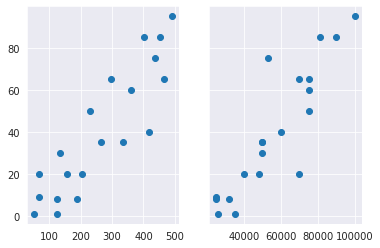

In [111]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(predictors['Number of Employees'], target)
ax2.scatter(predictors['Value of Contract'], target)
plt.show()

In [112]:
df.corr()

,Average Number of Tickets,Number of Employees,Value of Contract
Average Number of Tickets,1.000000,0.886683,0.885818
Number of Employees,0.886683,1.000000,0.789888
Value of Contract,0.885818,0.789888,1.000000


In [113]:
df.Industry.value_counts()

Services         8
Retail           7
Manufacturing    5
Name: Industry, dtype: int64

In [114]:
df = pd.get_dummies(df, columns=['Industry'], drop_first=True)
df.head()

,Average Number of Tickets,Number of Employees,Value of Contract,Industry_Retail,Industry_Services
0,1,51,25750,1,0
1,9,68,25000,0,1
2,20,67,40000,0,1
3,1,124,35000,1,0
4,8,124,25000,0,0


In [115]:
predictors = df.drop('Average Number of Tickets', axis=1)

In [116]:
predictors_const = sm.add_constant(predictors)
predictors_const.head()

,const,Number of Employees,Value of Contract,Industry_Retail,Industry_Services
0,1.0,51,25750,1,0
1,1.0,68,25000,0,1
2,1.0,67,40000,0,1
3,1.0,124,35000,1,0
4,1.0,124,25000,0,0


In [117]:
mod = sm.OLS(target, predictors_const)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Average Number of Tickets   R-squared:                       0.965
Model:                                   OLS   Adj. R-squared:                  0.956
Method:                        Least Squares   F-statistic:                     103.7
Date:                       Sun, 02 Aug 2020   Prob (F-statistic):           9.69e-11
Time:                               15:29:21   Log-Likelihood:                -62.537
No. Observations:                         20   AIC:                             135.1
Df Residuals:                             15   BIC:                             140.1
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -18.4504      4.765     -3.872      0.002     -28.606      -8.295
Number of Employees     0.1116      0.016      6.886      0.000       0.077       0.146
Value of Contract       0.0005      0.000      4.387      0.001       0.000       0.001
Industry_Retail        -8.7254      3.756     -2.323      0.035     -16.731      -0.720
Industry_Services      12.4938      3.700      3.377      0.004       4.607      20.380
==============================================================================
Omnibus:                        0.884   Durbin-Watson:                   2.835
Prob(Omnibus):                  0.643   Jarque-Bera (JB):                0.716
Skew:                          -0.010   Prob(JB):                        0.699
Kurtosis:                       2.073   Cond. No.                     2.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The trained model looks like:

y_hat = -18.4504 + 0.1116 * Number of Employees
        + 0.0005 * Value of Contract 
        - 8.7254 * Industry_Retail + 12.4938 * Industry_Services

In [118]:
y_pred = res.predict(predictors_const)

In [119]:
residuals = target - y_pred

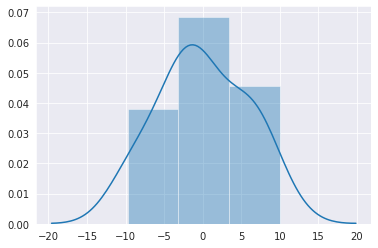

In [120]:
sns.distplot(residuals)

In [121]:
np.mean(residuals)

-3.1091129670812735e-12

In [124]:
shapiro_wilk = shapiro(residuals)
print('Test statistic:', shapiro_wilk[0])
print('P-value:', shapiro_wilk[1])

Test statistic: 0.9489314556121826
P-value: 0.35116079449653625


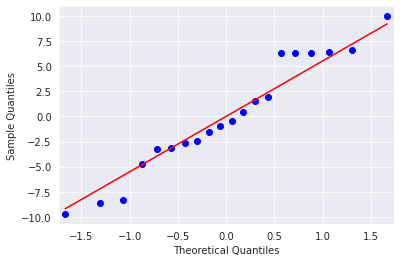

In [125]:
sm.qqplot(residuals, line='s')
plt.show()

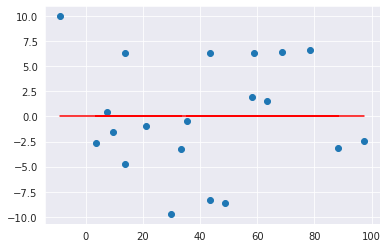

In [126]:
plt.scatter(y_pred, residuals)
plt.plot(y_pred, [np.mean(residuals)] * len(y_pred), c='r')
plt.show()

In [ ]:
predictors.drop(['Industry_Retail', 'Industry_Services'], axis=1, inplace=True)

In [135]:
vif = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=predictors.columns).T

,Number of Employees,Value of Contract
vif,11.364574,11.364574


In [136]:
predictors.corr()

,Number of Employees,Value of Contract
Number of Employees,1.000000,0.789888
Value of Contract,0.789888,1.000000


In [138]:
durbinWatson = durbin_watson(residuals)
durbinWatson

2.8345427969815544

In [140]:
rmse = mean_squared_error(target, y_pred, squared=False)
rmse

5.517383316061313

In [142]:
mean_of_average_n_tickets = np.mean(target)
mean_of_average_n_tickets

Average Number of Tickets    40.35
dtype: float64

In [143]:
rmse / mean_of_average_n_tickets * 100

Average Number of Tickets    13.673812
dtype: float64

#### The error is about 14% of mean average number of tickets